In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def drop_high_reg(df):
    return df[df.Regularization != 0.01]

In [3]:
def check_how_many_interval(df, max_difference):
    acc = df["Accuracy"]
    max_value = acc.max()
    df_filtered = df.loc[(df['Accuracy'] >= max_value - max_difference)]
    print("here max accuracy:")
    print(df.loc[(df['Accuracy'] == max_value)])
    loss = df["Loss"]
    min_value = loss.min()
    print("here min loss:")
    print(df.loc[(df['Loss'] == min_value)])
    print(list(df.columns))
    return len(df_filtered.index)

In [4]:
def plot_acc_and_loss(df):
    figure, ax1 = plt.subplots()
    ax1.plot(df[df.columns[0]],df['Accuracy'],linewidth=0.5,zorder=1, label = "Accuracy")
    figure, ax2 = plt.subplots()
    ax2.plot(df[df.columns[0]],df['Loss'],linewidth=0.5,zorder=1, label = "Accuracy")

In [5]:
def get_average_per_setting(df, possible_values):
    columns = list(df.columns)[1:-2]
    new_cols = ['Parameter', 'Value', 'Average_Accuracy', 'Average_Loss']
    new_df = pd.DataFrame(columns = new_cols) 
    for parameter in columns:
        for setting in possible_values[parameter]:
            filtered_df = df.loc[(df[parameter] == setting)]
            av_acc = sum(filtered_df['Accuracy'])/len(filtered_df['Accuracy'])
            av_loss = sum(filtered_df['Loss'])/len(filtered_df['Loss'])
            new_row = {'Parameter':parameter,'Value':setting,'Average_Accuracy':av_acc, 'Average_Loss':av_loss}
            new_df = new_df.append(new_row, ignore_index=True)
    return(new_df)

In [6]:
def get_average_over_multiple(df_list): #give the average value of a setting over multiple process models, input list of dataframes
    cols = list(df_list[0].columns)
    new_df = pd.DataFrame(columns = cols) 
    for index, row in df_list[0].iterrows():
        accuracys = []
        losses = []
        for df in df_list:
            accuracys.append(df.loc[index, "Accuracy"])
            losses.append(df.loc[index, "Loss"])
        av_acc = sum(accuracys)/len(accuracys)
        av_loss = sum(losses)/len(losses)
        new_row = {'Unnamed: 0':row['Unnamed: 0'],'Bidirectional':row['Bidirectional'],
                   'Nr_layers': row['Nr_layers'], 'Layer_size':row['Layer_size'],
                   'Regularization': row['Regularization'], 'Dropout': row['Dropout'],
                   'Accuracy':av_acc,'Loss':av_loss}
        new_df = new_df.append(new_row, ignore_index=True)
    return new_df

In [7]:
def get_average_per_setting_over_multiple(new_df_list):
    cols = list(new_df_list[0].columns)
    new_df = pd.DataFrame(columns = cols) 
    for index, row in new_df_list[0].iterrows():
        accuracys = []
        losses = []
        for df in new_df_list:
            accuracys.append(df.loc[index, "Average_Accuracy"])
            losses.append(df.loc[index, "Average_Loss"])
        av_acc = sum(accuracys)/len(accuracys)
        av_loss = sum(losses)/len(losses)
        new_row = {'Parameter':row['Parameter'],'Value':row['Value'],'Average_Accuracy':av_acc,'Average_Loss':av_loss}
        new_df = new_df.append(new_row, ignore_index=True)
    return new_df

In [8]:
#dictionary with for each parameter the possible values
possible_values = {}
possible_values["Bidirectional"] = [False, True]
possible_values["Nr_layers"] = [1, 2]
possible_values["Layer_size"] = [16, 32, 64]
possible_values["Regularization"] = [0.0, 0.0001, 0.001, 0.01]
possible_values["Dropout"] = [0.0 ,0.2, 0.4, 0.6]


In [9]:
max_difference = 0.01

In [10]:
df_list = []

In [11]:
averages_list = []

# Model 1

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
23          23          False          1          32          0.0001      0.6   

        Loss  Accuracy  
23  0.418302  0.776469  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
83          83          False          2          64             0.0      0.6   

        Loss  Accuracy  
83  0.399029  0.774628  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 159
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.681066      0.698390
1    Bidirectional    True          0.686866      0.677010
2        Nr_layers       1          0.772804      0.425201
3        Nr_layers       2          0.595128      0.950199
4       Layer_size      16          0.681272      0.698575
5       Layer_size      32          0.684874

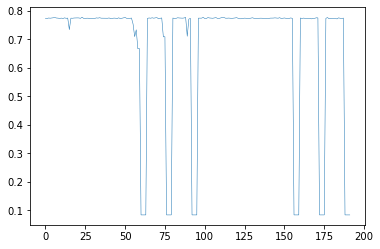

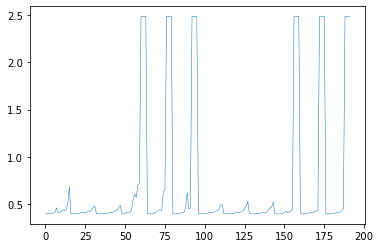

In [12]:
df = pd.read_csv('Model1.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 2

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
160         160           True          2          32             0.0   

     Dropout     Loss  Accuracy  
160      0.0  0.26978   0.80637  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
49          49          False          2          16             0.0      0.2   

        Loss  Accuracy  
49  0.269591  0.803699  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 168
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.710828      0.651499
1    Bidirectional    True          0.710926      0.649588
2        Nr_layers       1          0.804457      0.298928
3        Nr_layers       2          0.617297      1.002159
4       Layer_size      16          0.710832      0.652717
5       Layer_size      32          0.7109

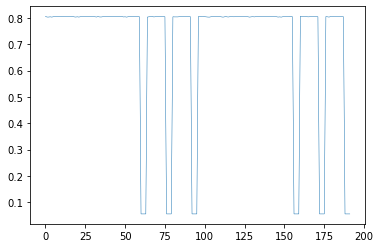

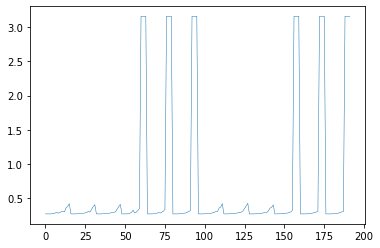

In [13]:
df = pd.read_csv('Model2.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 3

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
65          65          False          2          32             0.0      0.2   

        Loss  Accuracy  
65  0.269615  0.807911  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
67          67          False          2          32             0.0      0.6   

        Loss  Accuracy  
67  0.269571   0.80498  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 157
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.710278      0.665826
1    Bidirectional    True          0.709367      0.654131
2        Nr_layers       1          0.803509      0.304115
3        Nr_layers       2          0.616135      1.015841
4       Layer_size      16          0.709227      0.663576
5       Layer_size      32          0.708966

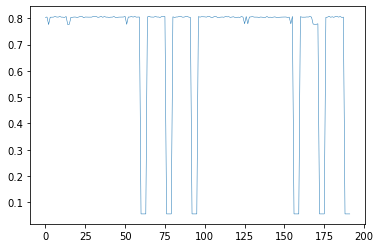

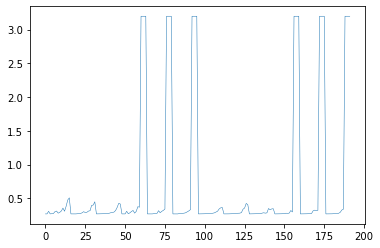

In [14]:
df = pd.read_csv('Model3.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 4

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
127         127           True          1          32            0.01   

     Dropout      Loss  Accuracy  
127      0.6  0.441343  0.835869  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
82          82          False          2          64             0.0      0.4   

        Loss  Accuracy  
82  0.266117  0.834879  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 168
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.737262      0.624837
1    Bidirectional    True          0.737334      0.612774
2        Nr_layers       1          0.833076      0.311668
3        Nr_layers       2          0.641520      0.925943
4       Layer_size      16          0.737286      0.626043
5       Layer_size      32          0.73

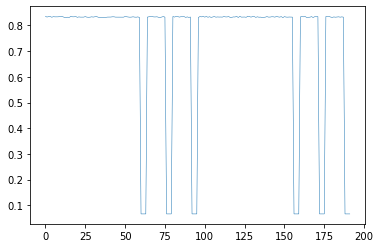

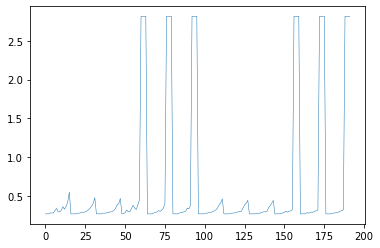

In [15]:
df = pd.read_csv('Model4.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 5

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
89          89          False          2          64           0.001      0.2   

        Loss  Accuracy  
89  0.261309  0.861539  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
163         163           True          2          32             0.0   

     Dropout      Loss  Accuracy  
163      0.6  0.197408  0.858898  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 167
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.755989      0.604746
1    Bidirectional    True          0.756001      0.591355
2        Nr_layers       1          0.857962      0.239667
3        Nr_layers       2          0.654028      0.956434
4       Layer_size      16          0.755627      0.604777
5       Layer_size      32          0.75

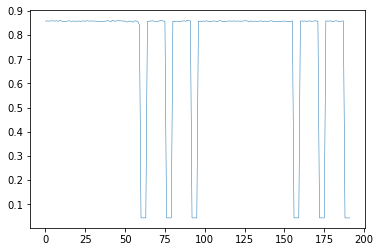

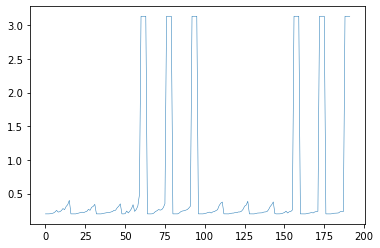

In [16]:
df = pd.read_csv('Model5.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 6

here max accuracy:
   Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
3           3          False          1          16             0.0      0.6   

       Loss  Accuracy  
3  0.204626  0.863562  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
65          65          False          2          32             0.0      0.2   

        Loss  Accuracy  
65  0.202424  0.853786  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 59
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.758470      0.538440
1    Bidirectional    True          0.756567      0.530460
2        Nr_layers       1          0.852753      0.239380
3        Nr_layers       2          0.662284      0.829520
4       Layer_size      16          0.758200      0.538107
5       Layer_size      32          0.757372     

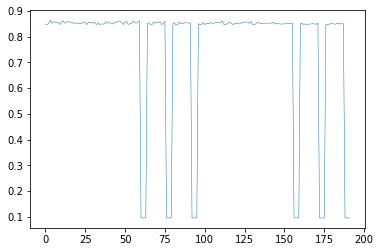

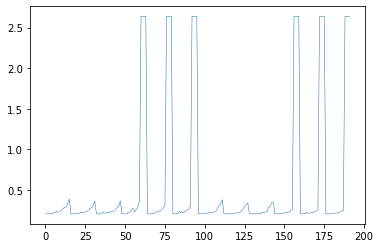

In [17]:
df = pd.read_csv('Model6.csv')
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Averages

In [18]:
all_averages = get_average_over_multiple(df_list)

In [19]:
print(all_averages)

    Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
0            0         False         1         16          0.0000      0.0   
1            1         False         1         16          0.0000      0.2   
2            2         False         1         16          0.0000      0.4   
3            3         False         1         16          0.0000      0.6   
4            4         False         1         16          0.0001      0.0   
..         ...           ...       ...        ...             ...      ...   
187        187          True         2         64          0.0010      0.6   
188        188          True         2         64          0.0100      0.0   
189        189          True         2         64          0.0100      0.2   
190        190          True         2         64          0.0100      0.4   
191        191          True         2         64          0.0100      0.6   

         Loss  Accuracy  
0    0.267805  0.820371  
1    0.2677

In [20]:
check_how_many_interval(all_averages, max_difference)

here max accuracy:
  Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
3          3         False         1         16             0.0      0.6   

       Loss  Accuracy  
3  0.270847  0.823093  
here min loss:
   Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
65         65         False         2         32             0.0      0.2   

        Loss  Accuracy  
65  0.267411  0.821928  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']


161

In [21]:
averages_df = get_average_per_setting_over_multiple(averages_list)

In [22]:
print(averages_df)

         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.725649      0.630623
1    Bidirectional    True          0.726177      0.619220
2        Nr_layers       1          0.820760      0.303160
3        Nr_layers       2          0.631065      0.946683
4       Layer_size      16          0.725407      0.630632
5       Layer_size      32          0.725961      0.623178
6       Layer_size      64          0.726371      0.620954
7   Regularization     0.0          0.820630      0.268548
8   Regularization  0.0001          0.820764      0.282276
9   Regularization   0.001          0.818725      0.309461
10  Regularization    0.01          0.443532      1.639401
11         Dropout     0.0          0.726158      0.611569
12         Dropout     0.2          0.725999      0.619080
13         Dropout     0.4          0.725709      0.627914
14         Dropout     0.6          0.725786      0.641121


# Again but 0.01 dropped

In [23]:
#dictionary with for each parameter the possible values
possible_values = {}
possible_values["Bidirectional"] = [False, True]
possible_values["Nr_layers"] = [1, 2]
possible_values["Layer_size"] = [16, 32, 64]
possible_values["Regularization"] = [0.0, 0.0001, 0.001]
possible_values["Dropout"] = [0.0 ,0.2, 0.4, 0.6]


In [24]:
max_difference = 0.01

In [25]:
df_list = []

In [26]:
averages_list = []

# Model 1

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
23          23          False          1          32          0.0001      0.6   

        Loss  Accuracy  
23  0.418302  0.776469  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
83          83          False          2          64             0.0      0.6   

        Loss  Accuracy  
83  0.399029  0.774628  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 136
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.765961      0.437601
1    Bidirectional    True          0.773061      0.409794
2        Nr_layers       1          0.773295      0.408759
3        Nr_layers       2          0.765727      0.438636
4       Layer_size      16          0.766383      0.435257
5       Layer_size      32          0.770527

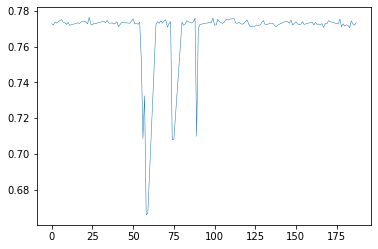

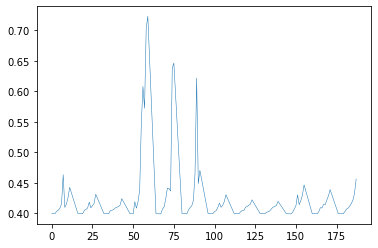

In [27]:
df = pd.read_csv('Model1.csv')
df = drop_high_reg(df)
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 2

here max accuracy:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
160         160           True          2          32             0.0   

     Dropout     Loss  Accuracy  
160      0.0  0.26978   0.80637  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
49          49          False          2          16             0.0      0.2   

        Loss  Accuracy  
49  0.269591  0.803699  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 144
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.804417      0.282280
1    Bidirectional    True          0.804565      0.278761
2        Nr_layers       1          0.804438      0.278142
3        Nr_layers       2          0.804544      0.282898
4       Layer_size      16          0.804449      0.282984
5       Layer_size      32          0.8045

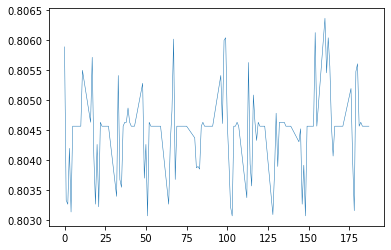

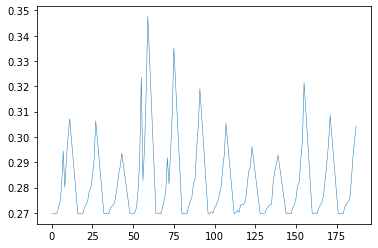

In [28]:
df = pd.read_csv('Model2.csv')
df = drop_high_reg(df)
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 3

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
65          65          False          2          32             0.0      0.2   

        Loss  Accuracy  
65  0.269615  0.807911  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
67          67          False          2          32             0.0      0.6   

        Loss  Accuracy  
67  0.269571   0.80498  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 137
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.804408      0.288500
1    Bidirectional    True          0.803198      0.279744
2        Nr_layers       1          0.804610      0.279946
3        Nr_layers       2          0.802995      0.288298
4       Layer_size      16          0.803456      0.288123
5       Layer_size      32          0.802848

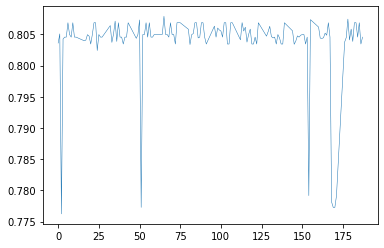

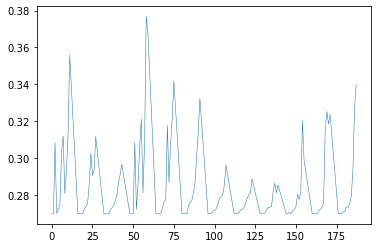

In [29]:
df = pd.read_csv('Model3.csv')
df = drop_high_reg(df)
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 4

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
0            0          False          1          16             0.0      0.0   
16          16          False          1          32             0.0      0.0   

        Loss  Accuracy  
0   0.266485  0.835609  
16  0.266352  0.835609  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
82          82          False          2          64             0.0      0.4   

        Loss  Accuracy  
82  0.266117  0.834879  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 144
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.833195      0.296798
1    Bidirectional    True          0.833159      0.281953
2        Nr_layers       1          0.833208      0.282928
3        Nr_layers       2          0.833146      0.2958

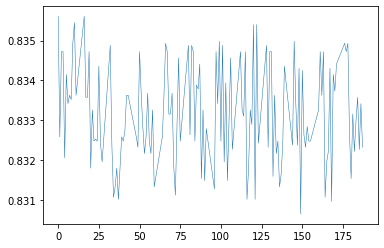

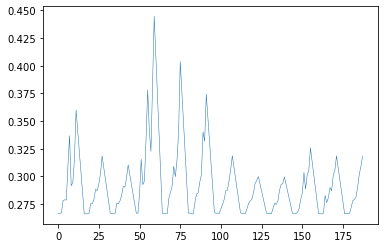

In [30]:
df = pd.read_csv('Model4.csv')
df = drop_high_reg(df)
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 5

here max accuracy:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
89          89          False          2          64           0.001      0.2   

        Loss  Accuracy  
89  0.261309  0.861539  
here min loss:
     Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  \
163         163           True          2          32             0.0   

     Dropout      Loss  Accuracy  
163      0.6  0.197408  0.858898  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 143
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.857686      0.232408
1    Bidirectional    True          0.857719      0.212066
2        Nr_layers       1          0.857861      0.214390
3        Nr_layers       2          0.857544      0.230084
4       Layer_size      16          0.857296      0.229367
5       Layer_size      32          0.85

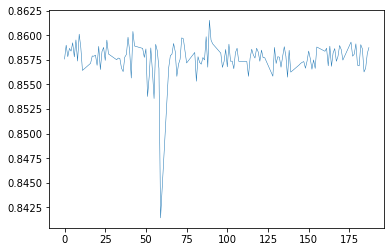

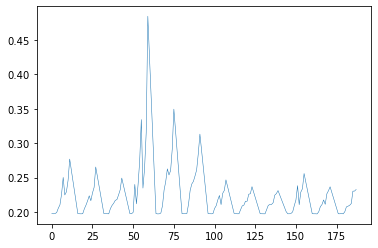

In [31]:
df = pd.read_csv('Model5.csv')
df = drop_high_reg(df)
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Model 6

here max accuracy:
   Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
3           3          False          1          16             0.0      0.6   

       Loss  Accuracy  
3  0.204626  0.863562  
here min loss:
    Unnamed: 0  Bidirectional  Nr_layers  Layer_size  Regularization  Dropout  \
65          65          False          2          32             0.0      0.2   

        Loss  Accuracy  
65  0.202424  0.853786  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']
NUMBER OF SETTING IN INTERVAL 41
         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.852771      0.226305
1    Bidirectional    True          0.850339      0.214928
2        Nr_layers       1          0.851823      0.215291
3        Nr_layers       2          0.851287      0.225943
4       Layer_size      16          0.852400      0.223937
5       Layer_size      32          0.851403     

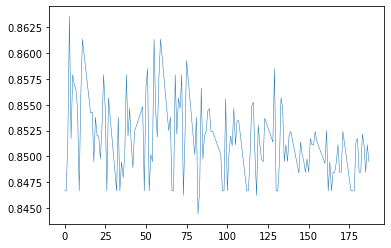

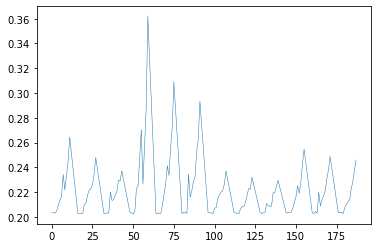

In [32]:
df = pd.read_csv('Model6.csv')
df = drop_high_reg(df)
df_list.append(df)
print("NUMBER OF SETTING IN INTERVAL", check_how_many_interval(df, max_difference))
plot_acc_and_loss(df)
average_df = get_average_per_setting(df, possible_values)
print(average_df)
averages_list.append(average_df)

# Averages

In [33]:
all_averages = get_average_over_multiple(df_list)

In [34]:
print(all_averages)

    Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
0            0         False         1         16          0.0000      0.0   
1            1         False         1         16          0.0000      0.2   
2            2         False         1         16          0.0000      0.4   
3            3         False         1         16          0.0000      0.6   
4            4         False         1         16          0.0001      0.0   
..         ...           ...       ...        ...             ...      ...   
139        183          True         2         64          0.0001      0.6   
140        184          True         2         64          0.0010      0.0   
141        185          True         2         64          0.0010      0.2   
142        186          True         2         64          0.0010      0.4   
143        187          True         2         64          0.0010      0.6   

         Loss  Accuracy  
0    0.267805  0.820371  
1    0.2677

In [35]:
check_how_many_interval(all_averages, max_difference)

here max accuracy:
  Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
3          3         False         1         16             0.0      0.6   

       Loss  Accuracy  
3  0.270847  0.823093  
here min loss:
   Unnamed: 0 Bidirectional Nr_layers Layer_size  Regularization  Dropout  \
49         65         False         2         32             0.0      0.2   

        Loss  Accuracy  
49  0.267411  0.821928  
['Unnamed: 0', 'Bidirectional', 'Nr_layers', 'Layer_size', 'Regularization', 'Dropout', 'Loss', 'Accuracy']


138

In [36]:
averages_df = get_average_per_setting_over_multiple(averages_list)

In [37]:
print(averages_df)

         Parameter   Value  Average_Accuracy  Average_Loss
0    Bidirectional   False          0.819740      0.293982
1    Bidirectional    True          0.820340      0.279541
2        Nr_layers       1          0.820873      0.279909
3        Nr_layers       2          0.819207      0.293614
4       Layer_size      16          0.819541      0.292879
5       Layer_size      32          0.820091      0.284849
6       Layer_size      64          0.820488      0.282556
7   Regularization     0.0          0.820630      0.268548
8   Regularization  0.0001          0.820764      0.282276
9   Regularization   0.001          0.818725      0.309461
10         Dropout     0.0          0.820300      0.277440
11         Dropout     0.2          0.820129      0.281960
12         Dropout     0.4          0.819675      0.288469
13         Dropout     0.6          0.820057      0.299178
